# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.382581
b   -0.724989
c   -0.025060
d   -1.433474
e    0.806278
dtype: float64
a         NaN
b   -1.449977
c   -0.050120
d   -2.866948
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-12-02
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
# tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
print(tseries)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00    10.590263
2022-12-01 10:45:00     8.003774
2022-12-02 10:45:00     9.872543
2022-12-03 10:45:00    11.052157
2022-12-04 10:45:00     8.836664
2022-12-05 10:45:00    12.316791
2022-12-06 10:45:00     7.982523
Freq: D, dtype: float64
2022-11-30 10:45:00    10.590263
2022-12-01 10:45:00     8.003774
2022-12-02 10:45:00     9.872543
2022-12-03 10:45:00    11.052157
Freq: D, dtype: float64 

2022-11-30 10:45:00    10.590263
2022-12-01 10:45:00     8.003774
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,-0.504859
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,-0.776894
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,0.414456
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,0.774718
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,1.531181
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,2.111984
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,-0.611471


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829


In [13]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,0.774718
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,1.531181
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,2.111984
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,-0.611471


In [14]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[-0.09763534,  0.37291097, -0.04531089,  1.39298628],
       [-0.09863878,  0.38363818, -0.68495268, -1.2138294 ],
       [ 1.85128998,  1.38845267, -0.52013178,  0.52617807],
       [-3.66281099, -1.18766851,  0.40718666, -0.50485943],
       [ 0.98585065, -0.40760579, -0.53021935, -0.77689428],
       [ 0.31573243,  0.75543954, -0.43767299,  0.41445624],
       [ 1.49409444,  0.44021017, -0.23280141,  0.7747181 ],
       [ 1.86950748, -1.07507664,  0.99896049,  1.5311806 ],
       [-1.05460642, -0.11016339, -1.08970051,  2.11198383],
       [ 1.34739176, -0.56702835,  0.45310687, -0.6114709 ]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.295018,-0.000689,-0.168154,0.364445
std,1.690463,0.819529,0.627372,1.114139
min,-3.662811,-1.187669,-1.089701,-1.213829
25%,-0.098388,-0.527173,-0.527697,-0.584818
50%,0.650792,0.131374,-0.335237,0.470317
75%,1.457419,0.426067,0.294062,1.238419
max,1.869507,1.388453,0.998960,2.111984


In [18]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,-0.097635,-0.098639,1.851290,-3.662811,0.985851,0.315732,1.494094,1.869507,-1.054606,1.347392
B,0.372911,0.383638,1.388453,-1.187669,-0.407606,0.755440,0.440210,-1.075077,-0.110163,-0.567028
C,-0.045311,-0.684953,-0.520132,0.407187,-0.530219,-0.437673,-0.232801,0.998960,-1.089701,0.453107
D,1.392986,-1.213829,0.526178,-0.504859,-0.776894,0.414456,0.774718,1.531181,2.111984,-0.611471


In [19]:
df.sort_index(axis=0,ascending=False) # invert index

,A,B,C,D
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,-0.611471
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,2.111984
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,1.531181
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,0.774718
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,0.414456
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,-0.776894
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,-0.504859
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986


In [20]:
df.sort_values(by="C")

,A,B,C,D
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,2.111984
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,-0.776894
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,0.414456
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,0.774718
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,-0.504859
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,-0.611471
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,1.531181


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00   -0.097635
2022-11-30 11:45:00   -0.098639
2022-11-30 12:45:00    1.851290
2022-11-30 13:45:00   -3.662811
2022-11-30 14:45:00    0.985851
2022-11-30 15:45:00    0.315732
2022-11-30 16:45:00    1.494094
2022-11-30 17:45:00    1.869507
2022-11-30 18:45:00   -1.054606
2022-11-30 19:45:00    1.347392
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00   -0.097635
2022-11-30 11:45:00   -0.098639
2022-11-30 12:45:00    1.851290
2022-11-30 13:45:00   -3.662811
2022-11-30 14:45:00    0.985851
2022-11-30 15:45:00    0.315732
2022-11-30 16:45:00    1.494094
2022-11-30 17:45:00    1.869507
2022-11-30 18:45:00   -1.054606
2022-11-30 19:45:00    1.347392
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
df[0:3]

,A,B,C,D
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178


In [23]:
# or by index
df["2022-11-30 10:45:00":"2022-11-30 12:45:00"]

,A,B,C,D
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.097635
B    0.372911
C   -0.045311
D    1.392986
Name: 2022-11-30 10:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,-0.097635,0.372911
2022-11-30 11:45:00,-0.098639,0.383638
2022-11-30 12:45:00,1.851290,1.388453
2022-11-30 13:45:00,-3.662811,-1.187669
2022-11-30 14:45:00,0.985851,-0.407606
2022-11-30 15:45:00,0.315732,0.755440
2022-11-30 16:45:00,1.494094,0.440210
2022-11-30 17:45:00,1.869507,-1.075077
2022-11-30 18:45:00,-1.054606,-0.110163
2022-11-30 19:45:00,1.347392,-0.567028


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.985851,-0.407606
2022-11-30 15:45:00,0.315732,0.755440
2022-11-30 16:45:00,1.494094,0.440210


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.09863877890430187
-0.09863877890430187


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -3.662811
B   -1.187669
C    0.407187
D   -0.504859
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -3.662811 -1.187669
2022-11-30 14:45:00  0.985851 -0.407606


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.098639,-0.684953
2022-11-30 12:45:00,1.851290,-0.520132
2022-11-30 14:45:00,0.985851,-0.530219


In [30]:
# slicing rows explicitly
df.iloc[1:3,:]


,A,B,C,D
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178


In [31]:
# slicing columns explicitly
df.iloc[:,1:3]

,B,C
2022-11-30 10:45:00,0.372911,-0.045311
2022-11-30 11:45:00,0.383638,-0.684953
2022-11-30 12:45:00,1.388453,-0.520132
2022-11-30 13:45:00,-1.187669,0.407187
2022-11-30 14:45:00,-0.407606,-0.530219
2022-11-30 15:45:00,0.755440,-0.437673
2022-11-30 16:45:00,0.440210,-0.232801
2022-11-30 17:45:00,-1.075077,0.998960
2022-11-30 18:45:00,-0.110163,-1.089701
2022-11-30 19:45:00,-0.567028,0.453107


In [32]:
# selecting an individual element by position
print(df.iloc[1,1])
print(df.iat[1,1])

0.383638179339517
0.383638179339517


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 10:45:00,-0.097635,0.372911,-0.045311,1.392986
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,-1.213829
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,0.526178
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,0.414456
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,0.774718


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaNs where condition is not met

,A,B,C,D
2022-11-30 10:45:00,NaN,0.372911,NaN,1.392986
2022-11-30 11:45:00,NaN,0.383638,NaN,NaN
2022-11-30 12:45:00,1.851290,1.388453,NaN,0.526178
2022-11-30 13:45:00,NaN,NaN,0.407187,NaN
2022-11-30 14:45:00,0.985851,NaN,NaN,NaN
2022-11-30 15:45:00,0.315732,0.755440,NaN,0.414456
2022-11-30 16:45:00,1.494094,0.440210,NaN,0.774718
2022-11-30 17:45:00,1.869507,NaN,0.998960,1.531181
2022-11-30 18:45:00,NaN,NaN,NaN,2.111984
2022-11-30 19:45:00,1.347392,NaN,0.453107,NaN


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df


,A,B,C,D,E,E prime
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.372911,-0.045311,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.098639,-0.383638,-0.684953,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-1.851290,-1.388453,-0.520132,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,-0.407187,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.985851,-0.407606,-0.530219,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-0.315732,-0.755440,-0.437673,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-1.494094,-0.440210,-0.232801,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-1.869507,-1.075077,-0.998960,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-1.347392,-0.567028,-0.453107,-5,-4.5,-18,-0.996917


In [38]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [39]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,0.996917


In [40]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


In [41]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


In [42]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [43]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.372911,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,0.383638,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.851290,1.388453,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,NaN,NaN,0.407187,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.985851,NaN,NaN,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.315732,0.755440,NaN,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.494094,0.440210,NaN,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.869507,NaN,0.998960,5,3.5,14.0,0.998135
2022-11-30 18:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.347392,NaN,0.453107,5,4.5,18.0,0.996917


In [44]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [45]:
# getting a mask
df_wNan.isna()
# df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,True,False,True,True,False
2022-11-30 11:45:00,True,False,True,False,False,False,False
2022-11-30 12:45:00,False,False,True,False,False,False,False
2022-11-30 13:45:00,True,True,False,False,False,False,False
2022-11-30 14:45:00,False,True,True,False,False,False,False
2022-11-30 15:45:00,False,False,True,False,False,False,False
2022-11-30 16:45:00,False,False,True,False,False,False,False
2022-11-30 17:45:00,False,True,False,False,False,False,False
2022-11-30 18:45:00,True,True,True,False,False,False,False
2022-11-30 19:45:00,False,True,False,False,False,False,False


In [46]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,0.000000,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,0.383638,0.000000,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.851290,1.388453,0.000000,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.000000,0.000000,0.407187,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.985851,0.000000,0.000000,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.315732,0.755440,0.000000,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.494094,0.440210,0.000000,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.869507,0.000000,0.998960,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.000000,0.000000,0.000000,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.347392,0.000000,0.453107,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [47]:
df_wNan.fillna(method='pad') # here we use both forward and backward propagation

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.372911,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,0.383638,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,1.851290,1.388453,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.851290,1.388453,0.407187,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.985851,1.388453,0.407187,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.315732,0.755440,0.407187,5,2.5,10.0,0.999048
2022-11-30 16:45:00,1.494094,0.440210,0.407187,5,3.0,12.0,0.998630
2022-11-30 17:45:00,1.869507,0.440210,0.998960,5,3.5,14.0,0.998135
2022-11-30 18:45:00,1.869507,0.440210,0.998960,5,4.0,16.0,0.997564
2022-11-30 19:45:00,1.347392,0.440210,0.453107,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [48]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.304781
B         -0.000689
C         -0.168154
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.903943
2022-11-30 11:45:00    1.157144
2022-11-30 12:45:00    1.959923
2022-11-30 13:45:00    1.293766
2022-11-30 14:45:00    2.292488
2022-11-30 15:45:00    2.733221
2022-11-30 16:45:00    3.242876
2022-11-30 17:45:00    3.613075
2022-11-30 18:45:00    3.391871
2022-11-30 19:45:00    4.247198
Freq: H, dtype: float64 



In [49]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.756549,-0.730264,10,0.5,2,1.999962
2022-11-30 12:45:00,1.752651,2.145002,-1.250395,15,1.5,6,2.999810
2022-11-30 13:45:00,-1.910160,0.957333,-0.843209,20,3.0,12,3.999467
2022-11-30 14:45:00,-0.924309,0.549728,-1.373428,25,5.0,20,4.998858
2022-11-30 15:45:00,-0.608577,1.305167,-1.811101,30,7.5,30,5.997906
2022-11-30 16:45:00,0.885518,1.745377,-2.043902,35,10.5,42,6.996536
2022-11-30 17:45:00,2.755025,0.670301,-1.044942,40,14.0,56,7.994670
2022-11-30 18:45:00,1.700419,0.560137,-2.134642,45,18.0,72,8.992234
2022-11-30 19:45:00,3.047811,-0.006891,-1.681536,50,22.5,90,9.989152


In [50]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.372911,-0.045311,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.098639,0.383638,-0.684953,5,0.5,2,0.999962
2022-11-30 12:45:00,1.851290,1.388453,-0.520132,5,1.0,4,0.999848
2022-11-30 13:45:00,-3.662811,-1.187669,0.407187,5,1.5,6,0.999657
2022-11-30 14:45:00,0.985851,-0.407606,-0.530219,5,2.0,8,0.999391
2022-11-30 15:45:00,0.315732,0.755440,-0.437673,5,2.5,10,0.999048
2022-11-30 16:45:00,1.494094,0.440210,-0.232801,5,3.0,12,0.998630
2022-11-30 17:45:00,1.869507,-1.075077,0.998960,5,3.5,14,0.998135
2022-11-30 18:45:00,-1.054606,-0.110163,-1.089701,5,4.0,16,0.997564
2022-11-30 19:45:00,1.347392,-0.567028,0.453107,5,4.5,18,0.996917


In [51]:
df.apply(lambda x: x.max() - x.min())

A           5.532318
B           2.576121
C           2.088661
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [52]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    0.372911
2022-11-30 11:45:00    0.284999
2022-11-30 12:45:00    3.239743
2022-11-30 13:45:00   -4.850480
2022-11-30 14:45:00    0.578245
2022-11-30 15:45:00    1.071172
2022-11-30 16:45:00    1.934305
2022-11-30 17:45:00    0.794431
2022-11-30 18:45:00   -1.164770
2022-11-30 19:45:00    0.780363
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [53]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="//wsl$/Ubuntu/home/tancredir/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [54]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [55]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [56]:
# # the old slooow way
# def conversion(data):
#     result=[]
#     for i in range(len(data)): 
#         result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
#     return result

# data['timens']=conversion(data)
# data['timens']

# It takes more than 1.30 minute to be runned

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [57]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.317510,0.056604,-1.022923,1.028206
1,-0.124684,-1.297990,0.644533,0.664858
2,0.200933,-0.481252,-0.519094,-0.918893
3,0.377514,0.764227,0.307389,-0.949785
4,0.139874,-1.370582,-0.377744,0.158289
5,-0.024013,-0.121111,0.053471,-0.448819
6,1.757383,-0.518741,-0.979260,0.199266
7,-1.652232,0.380190,1.182170,-2.015484
8,-0.039474,0.585249,0.194470,-1.071728
9,-1.061799,1.661300,-0.162623,1.984489


In [58]:
# divide it into pieces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.317510  0.056604 -1.022923  1.028206
 1 -0.124684 -1.297990  0.644533  0.664858
 2  0.200933 -0.481252 -0.519094 -0.918893,
           0         1         2         3
 3  0.377514  0.764227  0.307389 -0.949785
 4  0.139874 -1.370582 -0.377744  0.158289
 5 -0.024013 -0.121111  0.053471 -0.448819
 6  1.757383 -0.518741 -0.979260  0.199266,
           0         1         2         3
 7 -1.652232  0.380190  1.182170 -2.015484
 8 -0.039474  0.585249  0.194470 -1.071728
 9 -1.061799  1.661300 -0.162623  1.984489]

In [59]:
# put it back together
# pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.317510,0.056604,-1.022923,1.028206
1,-0.124684,-1.297990,0.644533,0.664858
2,0.200933,-0.481252,-0.519094,-0.918893
3,0.377514,0.764227,0.307389,-0.949785
4,0.139874,-1.370582,-0.377744,0.158289
5,-0.024013,-0.121111,0.053471,-0.448819
6,1.757383,-0.518741,-0.979260,0.199266
7,-1.652232,0.380190,1.182170,-2.015484
8,-0.039474,0.585249,0.194470,-1.071728
9,-1.061799,1.661300,-0.162623,1.984489


In [60]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)

,0,1,2,3
0,1.317510,0.056604,-1.022923,1.028206
1,-0.124684,-1.297990,0.644533,0.664858
2,0.200933,-0.481252,-0.519094,-0.918893
3,0.377514,0.764227,0.307389,-0.949785
4,0.139874,-1.370582,-0.377744,0.158289
5,-0.024013,-0.121111,0.053471,-0.448819
6,1.757383,-0.518741,-0.979260,0.199266
7,-1.652232,0.380190,1.182170,-2.015484
8,-0.039474,0.585249,0.194470,-1.071728
9,-1.061799,1.661300,-0.162623,1.984489


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [62]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.485192,1.773456
1,bar,one,-1.908051,0.062739
2,foo,two,-0.494882,0.126758
3,bar,three,2.029930,-0.579524
4,foo,two,-0.216764,0.150718
5,bar,two,-0.160063,0.173996
6,foo,one,-1.047222,0.433001
7,foo,three,0.022141,-1.773322


In [63]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.038183,-0.342789
foo,-1.251534,0.710611


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [64]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
s

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 



first  second
bar    one       1.073761
       two      -1.706760
baz    one       0.394111
       two      -0.684117
foo    one       0.062568
       two      -0.634646
qux    one       2.031454
       two      -1.176066
dtype: float64

In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.908051  0.062739
    three  2.029930 -0.579524
    two   -0.160063  0.173996
foo one   -0.562030  2.206457
    three  0.022141 -1.773322
    two   -0.711645  0.277476

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.908051
            D    0.062739
     three  C    2.029930
            D   -0.579524
     two    C   -0.160063
            D    0.173996
foo  one    C   -0.562030
            D    2.206457
     three  C    0.022141
            D   -1.773322
     two    C   -0.711645
            D    0.277476
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

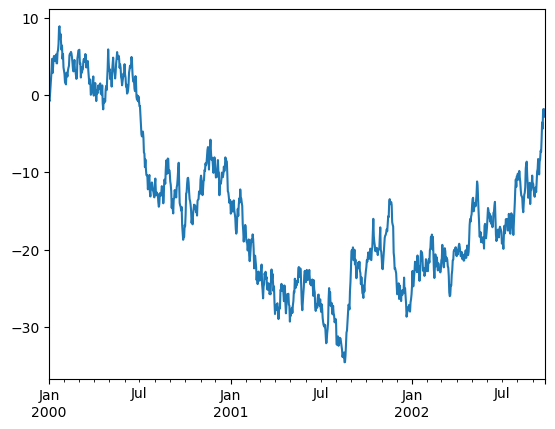

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

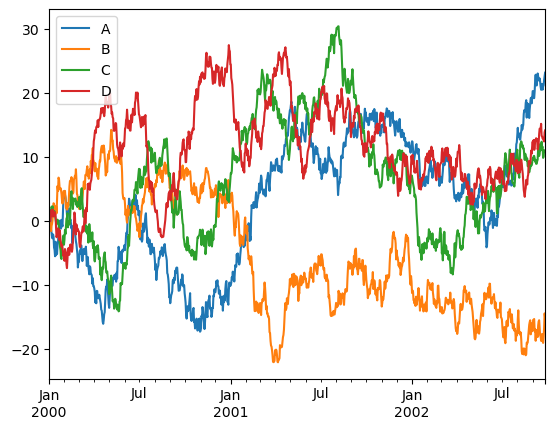

In [68]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); 
pdf.plot();
plt.legend(loc='best');